### Naive Bayes Learning on Fraud Detection

In [52]:
#importing all required libraries pandas, numpy, math, random, csv
import pandas as pd
import numpy as np
import math
import random
import csv

In [53]:
#Reading the dataset into a pandas Dataframe
Data =pd.read_csv('loan_data_set.csv')

In [54]:
#displaying the data
Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data Preprocessing

#### 1.Renaming the columns

In [50]:
Data.rename(columns = {'Loan_Amount_Term':'Loan_Tenure'}, inplace = True)

#### 2.Finding out the duplicates in Dataset

In [55]:
#count and display number of Duplicates in data
Duplicates=Data[Data.duplicated()]
Duplicates.count()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 3.Checking for NULL VALUES

In [56]:
# checking Null values
Data.isna().any().any()


True

In [57]:
#Number of Null values in each column
Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Limited records so we cannot afford to drop records
print(len(Data))

614


#### 4.Dealing with numerical null values

In [58]:
#fill all the Null values with corresponding columns mean value
Data1= Data.fillna(Data.mean())

C:\Users\SAIPRA~1\AppData\Local\Temp/ipykernel_14532/701245121.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Data1= Data.fillna(Data.mean())


In [59]:
#displaying numer of null values after preprocessing with mean
Data1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
Data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


#### 4.Dealing with categorical Null values

In [61]:
# using the value_counts get the categories and find out the index of category with higher value to extract mode
#refilll the categorical null values with mode
categorical_features = ['Gender','Married','Dependents','Self_Employed']
for feature in categorical_features:
    Data1[feature] = Data1[feature].fillna(pd.DataFrame(Data[feature].value_counts()).index[0])

In [62]:
#displaying the null values in dataset
Data1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
Data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [64]:
#finding the data types of features
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
#calculating the stats of numeric data
Data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [66]:
# defining a function to encode target values of Y,N with 1,0
def encode_class(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata.iloc[i,-1] not in classes:
            classes.append(mydata.iloc[i,-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata.iloc[j,-1] == classes[i]:
                mydata.iloc[j,-1] = i
    return mydata 

In [67]:
Data1.iloc[0,-1]
Y=Data1['Loan_Status']

In [68]:
Data1 = Data1.drop(['Loan_ID','Loan_Status'],axis=1)

In [71]:
# conversion of categorical features into 1,0 using get_dummies()
Data2 = pd.get_dummies(Data1)

In [72]:
Data2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [73]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    uint8  
 6   Gender_Male              614 non-null    uint8  
 7   Married_No               614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_0             614 non-null    uint8  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Dependents_3+            614 non-null    uint8  
 13  Education_Graduate       614 non-null    uint8  
 14  Education_Not Graduate   6

### Visualizations

<AxesSubplot:>

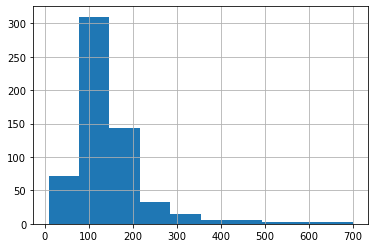

In [109]:
#histogram for distribution of loan_amount
Data['LoanAmount'].hist()

<AxesSubplot:>

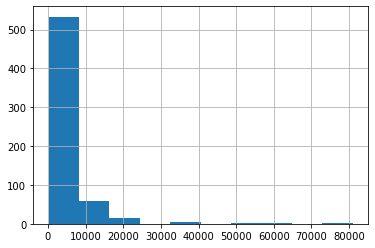

In [110]:
#histogram for distribution of ApplicantIncome
Data['ApplicantIncome'].hist()

Text(0.5, 32.99999999999995, 'HouseholdIncome')

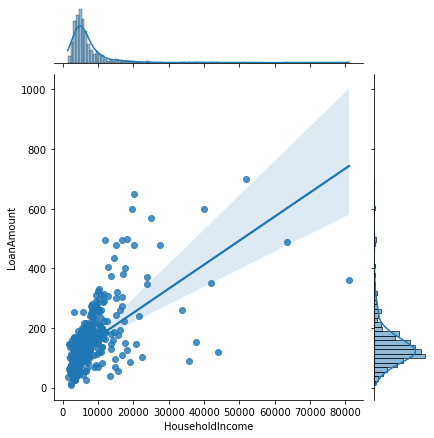

In [108]:
#plotting joint plot to identify the relations
plot=sns.jointplot(data=Data2, y="LoanAmount", x=Data2["ApplicantIncome"]+Data2['CoapplicantIncome'], kind="reg")
plot.ax_joint.set_xlabel('HouseholdIncome')

##### we can infer that as the house hold income of applicants increases the loan amount for lending also increases with positive corelation. above graph shoes the plot with scope of loan amount with respect to house hold income

#### Splitting Data for training and testing model

In [74]:
X=Data2
#Y=Data1['Loan_Status']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [75]:
X_train.shape

(491, 20)

In [76]:
Y_train.shape

(491,)

#### Building the Naive bayes model

In [77]:
# initializing a gaussian naive bayes classifer
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

#### Evaluating the Model

In [78]:
#defining a function to evaluate the classifier
def evaluate_classifier(model,x_test,y_test):
    Data = list(model.predict(x_test))
    return Data

In [80]:
#sample predictions from model
Result=evaluate_classifier(classifier,X_test,Y_test)
print(Result)

['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y']


In [81]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
Predicted_class = classifier.predict(X_test)


In [82]:
# defining a function to calculate the accuracy of model
def calculate_accuracy(model,y_test,x_test):
    from sklearn import metrics
    return metrics.accuracy_score(y_test, model.predict(x_test))

In [83]:
#defining a function to calculate the performance ability of model
def calculate_confusion_matrix(model,y_test,x_test):
    from sklearn.metrics import confusion_matrix
    print(metrics.confusion_matrix(y_test, model.predict(x_test)))

In [87]:
#displaying accuracy
print('The accuracy of developed model is ' + str(calculate_accuracy(classifier,Y_test,X_test)))

The accuracy of developed model is 0.8292682926829268


In [88]:
#displaying the confusion matrix
confusion_matrix=calculate_confusion_matrix(classifier,Y_test,X_test)

[[15 18]
 [ 3 87]]


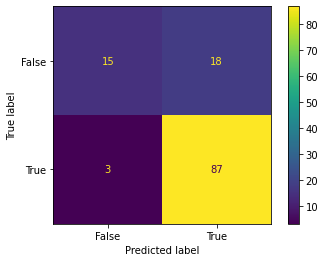

In [89]:
# developing a visualization to plot the confusion matrix
import matplotlib.pyplot as plt
actual = Y_test
predicted=classifier.predict(X_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(actual,predicted), display_labels = [False, True])
cm_display.plot()
plt.show()

In [90]:
# displaying the summary stats of classifier
from sklearn.metrics import classification_report 
print(classification_report(Y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           N       0.83      0.45      0.59        33
           Y       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score# evaluate the algorythm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
# In k-fold cross-validation, the original sample is randomly partitioned into k equal sized
#subsamples. Of the k subsamples, a single subsample is retained as the validation data for
#testing the model, and the remaining k − 1 subsamples are used as training data. The crossvalidation process is then repeated k times, with each of the k subsamples used exactly once as
#the validation data. The k results can then be averaged to produce a single estimation. The
#advantage of this method over repeated random sub-sampling is that all observations are used for
#both training and validation, and each observation is used for validation exactly once
kfold = KFold(n_splits, random_state=seed, shuffle=True)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'

# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)

# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation
print(results)

[0.82258065 0.82258065 0.74193548 0.77419355 0.78688525 0.75409836
 0.81967213 0.75409836 0.81967213 0.81967213]


In [92]:
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.792 (0.031)


##### ROC Curve

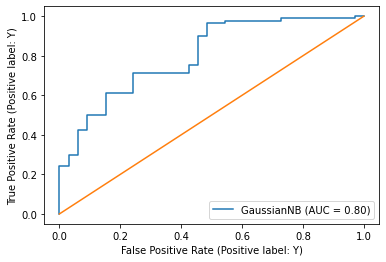

In [93]:
#developing the Roc curve to identify the performance
from sklearn.metrics import plot_roc_curve
plot_roc_curve(estimator= classifier, X=X_test,y=Y_test)
xpoints=np.array([0,1])
ypoints=np.array([0,1])
plt.plot(xpoints,ypoints)
plt.show()
